# Quantum Teleportation Protocol in Qiskit

In [45]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

## Instantiate QuantumCircuit

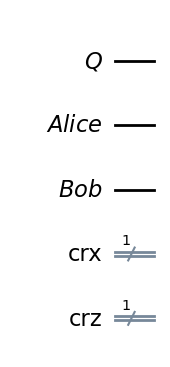

In [46]:
qubit = QuantumRegister(1, "Q")
alice = QuantumRegister(1, "Alice")
bob = QuantumRegister(1, "Bob")
a = ClassicalRegister(1, "crx")
b = ClassicalRegister(1, "crz")

protocol = QuantumCircuit(qubit, alice, bob, a, b)
display(protocol.draw(output="mpl", style="iqp"))

## Prepare entangled qubits


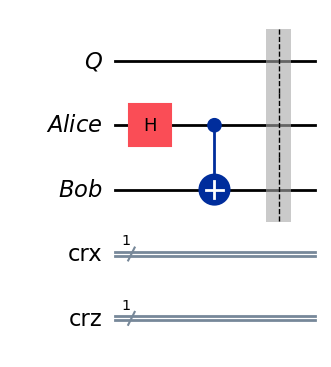

In [47]:
# Prepare ebit used for teleportation
protocol.h(alice)
protocol.cx(alice, bob)
protocol.barrier()
display(protocol.draw(output="mpl", style="iqp"))

## Alice prepares the qubit and makes measurements to the qubits

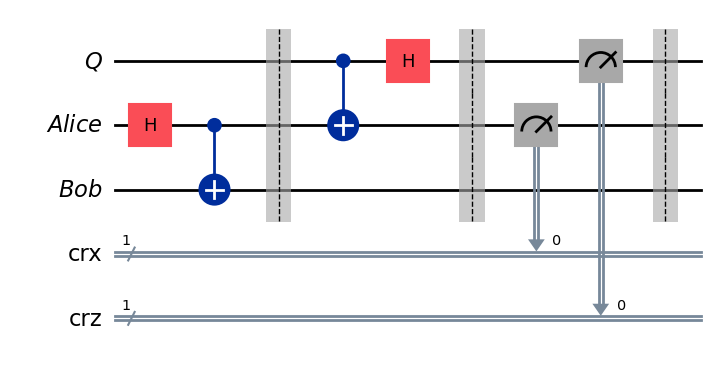

In [48]:

# Alice's operations
protocol.cx(qubit, alice)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(alice, a)
protocol.measure(qubit, b)
protocol.barrier()
display(protocol.draw(output="mpl", style="iqp"))

##  Bob uses the classical bits to conditionally apply gates

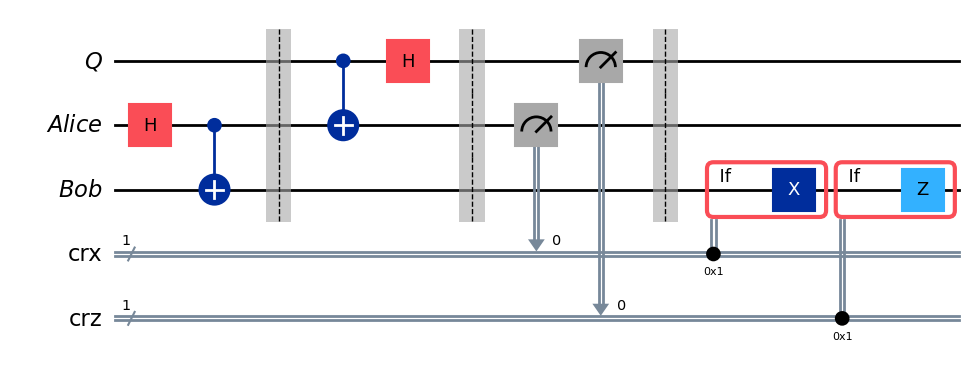

In [49]:
with protocol.if_test((a, 1)):
    protocol.x(bob)
with protocol.if_test((b, 1)):
    protocol.z(bob)

display(protocol.draw(output="mpl", style="iqp"))

## Teleport $|1\rangle$

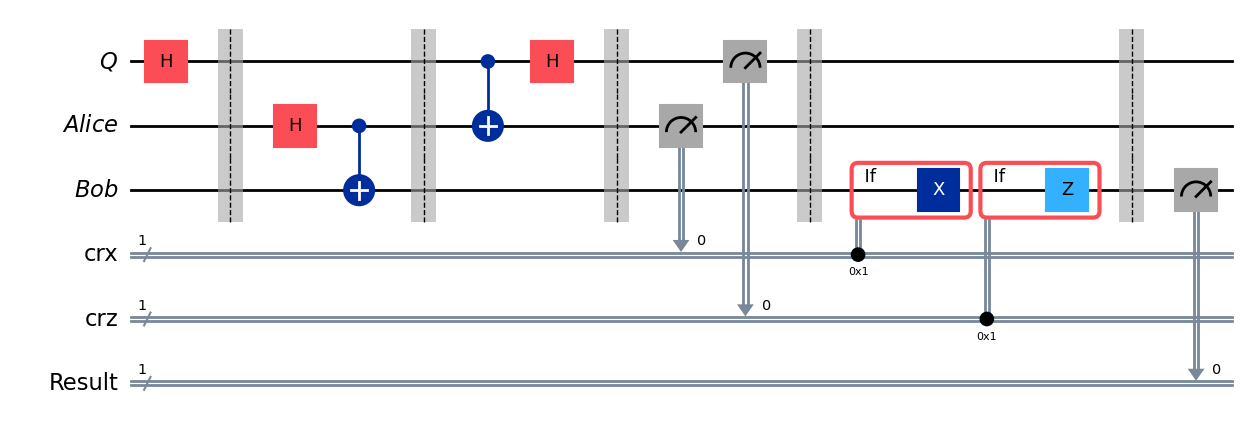

In [50]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, alice, bob, a, b)

# Start with the randomly selected gate on Q

test.h(qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()


result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(bob, result)

display(test.draw(output="mpl", style="iqp"))

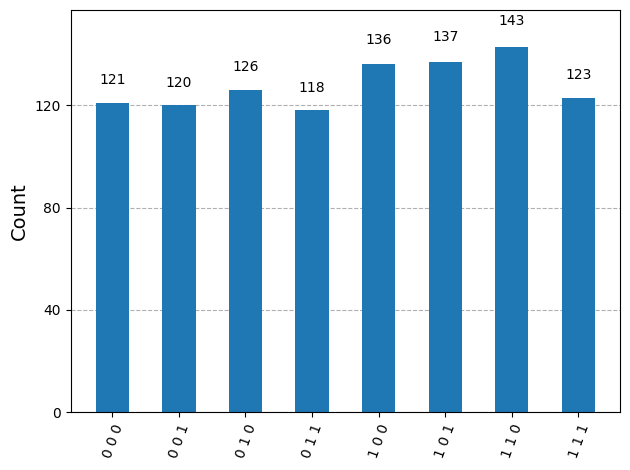

In [51]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

##  Teleport a random state

In [52]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(random_gate.to_matrix())

array([[-0.91577223+0.j        , -0.1837303 +0.35721757j],
       [-0.36383722-0.17024598j,  0.7245237 -0.56009302j]])

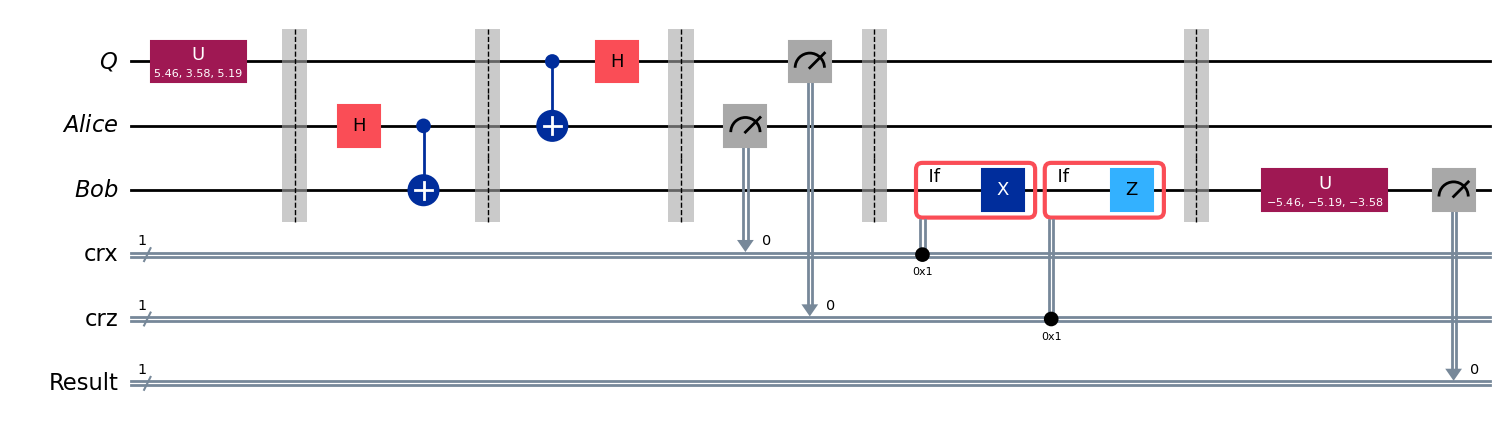

In [53]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, alice, bob, a, b)

# Start with the randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), bob)

result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(bob, result)

display(test.draw(output="mpl", style="iqp"))

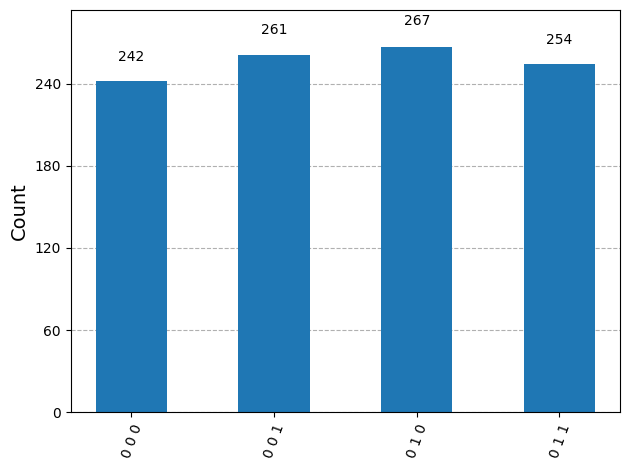

In [54]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

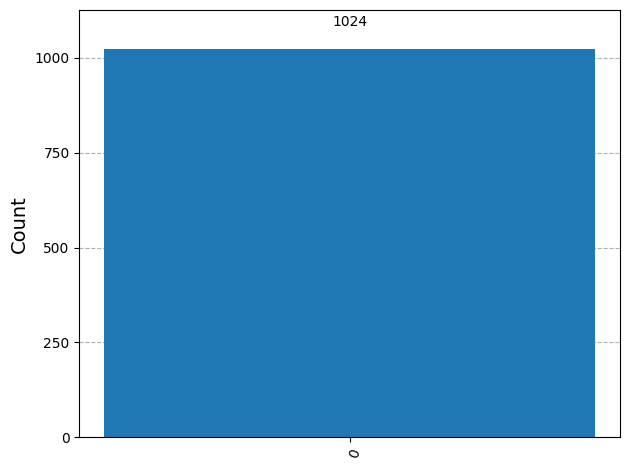

In [55]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))